In [70]:
import pandas as pd
import numpy as np

# Investigate list of Nintendo Switch games to find next purchase
# Data downloaded from https://www.kaggle.com/datasets/giovanni60310/nintendo-switch-games-reviews?select=switch-games.csv

df = pd.read_csv(r"C:\Users\datri\Downloads\nintendo_games\switch-games.csv")

In [24]:
df.head()

,id,title,game_url,image_url,system,publisher,developer,genre,num_players,release_date,review,review_conclusion,num_votes,rating
0,0f0191a3,The DioField Chronicle,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/d9a6ef84ec8cf/...,Nintendo Switch,Square Enix,Square Enix,RPG Simulation Strategy,1,22nd Sep 2022,Published by Square Enix and developed with as...,Despite its shortcomings The DioField Chronic...,0,0.0
1,f2af5f5f,The Legend of Heroes: Trails from Zero,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/004c2655b08cc/...,Nintendo Switch,NIS America,Nihon Falcom,RPG,1,27th Sep 2022,We dont blame you if you’re intimidated by Fal...,In a series renowned for its stellar writing ...,0,0.0
2,a8996117,NBA 2K23,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/60aff0dbdc402/...,Nintendo Switch,2K,Visual Concepts,Sports,4 (10 Online),9th Sep 2022,Its once again reached that time of year when ...,NBA 2K23 makes the inevitable downgrades and c...,2,0.0
3,e2f10932,Temtem,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/c6c585ce49b59/...,Nintendo Switch,Humble Games,Crema Games,Action Adventure RPG,1 (999 Online),6th Sep 2022,At the beginning of our Temtem adventure we h...,Even without the endgame content Temtem is wo...,5,7.8
4,51ff4f64,Made in Abyss: Binary Star Falling into Darkness,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/063177f5b67f4/...,Nintendo Switch,Spike Chunsoft US,Chime,Action RPG,1,2nd Sep 2022,Made in Abyss feels like an anime/manga ripe f...,Made in Abyss is an odd game to recommend; the...,2,0.0


In [28]:
df.columns

Index(['id', 'title', 'game_url', 'image_url', 'system', 'publisher',
       'developer', 'genre', 'num_players', 'release_date', 'review',
       'review_conclusion', 'num_votes', 'rating'],
      dtype='object')

df[id]

In [71]:
df.dtypes

id                    object
title                 object
game_url              object
image_url             object
system                object
publisher             object
developer             object
genre                 object
num_players           object
release_date          object
review                object
review_conclusion     object
num_votes             object
rating               float64
dtype: object

In [72]:
# convert num_votes to integer, but need to remove ' ' characters

df['num_votes'] = df['num_votes'].replace(' ','',regex=True).astype('int64')

In [73]:
df.dtypes

id                    object
title                 object
game_url              object
image_url             object
system                object
publisher             object
developer             object
genre                 object
num_players           object
release_date          object
review                object
review_conclusion     object
num_votes              int64
rating               float64
dtype: object

In [69]:
df.dtypes

id                    object
title                 object
game_url              object
image_url             object
system                object
publisher             object
developer             object
genre                 object
num_players           object
release_date          object
review                object
review_conclusion     object
num_votes              int64
rating               float64
dtype: object

In [181]:
# create new df for all games with >250 votes

df_reviewed = df[df['num_votes']>250]

In [182]:
df_reviewed['publisher'].unique()

array(['Nintendo', 'Capcom', 'CD Projekt Red', 'Square Enix', 'Ubisoft',
       'SEGA', 'Mojang', 'Bethesda Softworks'], dtype=object)

In [184]:
#df_reviewed['genre'].unique()
df_reviewed.shape

(54, 14)

In [149]:
df_reviewed['genre'].value_counts()

genre
Action  Adventure                9
RPG                              5
Action  Platformer               5
Adventure  RPG                   4
Adventure  Platformer            2
Platformer                       2
Action  RPG                      2
Action  Adventure  Platformer    2
Action  Adventure  Fighting      2
Action  Adventure  RPG           2
Creative  Education              1
Action  FPS                      1
Action                           1
Shooter                          1
Sports                           1
Fighting  Sports                 1
Puzzle  RPG                      1
Adventure  RPG  Strategy         1
Action  Fighting                 1
Action  Creative  Platformer     1
Board Game  Party                1
Adventure  Puzzle  Simulation    1
Party  Racing                    1
Adventure  Strategy              1
Simulation                       1
Adventure                        1
Racing                           1
Name: count, dtype: int64

In [185]:
# create new column to reduce and clarify genre column - action, platformer, RPG, shooter/FPS, sports, party, fighting

# define function to organize genre into fewer categories
def select_genre(genre_in):
    if 'Platformer' in genre_in:
        return 'Platformer'
    if 'RPG' in genre_in:
        return 'RPG'
    if ('Shooter' in genre_in) or ('FPS' in genre_in):
        return 'Shooter'
    if ('Sports' in genre_in) or ('Racing' in genre_in):
        return 'Sports'
    if 'Adventure' in genre_in:
        return 'Adventure'
    if 'Action' in genre_in:
        return 'Action'
    if 'Party' in genre_in:
        return 'Party'
    return 'Other'

#select_genre(df_reviewed['genre'][0])



In [194]:
#df_reviewed.loc[:,'genre'].fillna('', inplace=True)  # remove NaN from genre column
#df_reviewed['genre']
#df_reviewed.reset_index(inplace=True)   # reset index
#df_reviewed.head()

,index,id,title,game_url,image_url,system,publisher,developer,genre,num_players,release_date,review,review_conclusion,num_votes,rating
0,72,d9fc5767,Pokémon Brilliant Diamond and Shining Pearl,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/87efd6adf5b23/...,Nintendo Switch,Nintendo,ILCA,Adventure RPG,1,19th Nov 2021,It’s always difficult to know just how much of...,While some of the slower elements of the origi...,445,7.1
1,82,8b22873c,Mario Party Superstars,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/ea8a2b02d166e/...,Nintendo Switch,Nintendo,Nintendo,Board Game Party,4,29th Oct 2021,For years now fans of the Mario Party series h...,Mario Party Superstars is a love letter to the...,278,8.5
2,88,fbc872d6,Metroid Dread,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/42ec6a39233bc/...,Nintendo Switch,Nintendo,Nintendo MercurySteam,Action Adventure,1,8th Oct 2021,After absolutely nailing its first shot at a M...,Metroid Dread is a triumphant return for both ...,952,9.3
3,117,20c3d5f7,The Great Ace Attorney Chronicles,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/4677c30259c64/...,Nintendo Switch,Capcom,Capcom,Adventure,1,27th Jul 2021,The last time we saw Phoenix Wright and friend...,The Great Ace Attorney Chronicles is two brill...,286,8.7
4,120,753871e1,The Legend of Zelda: Skyward Sword HD,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/5b4cf64fd0226/...,Nintendo Switch,Nintendo,Nintendo,Action Adventure,1,16th Jul 2021,Returning to The Legend of Zelda: Skyward Swor...,The Legend of Zelda: Skyward Sword HD introduc...,458,8.3


In [193]:
# create a list from the genre column and generate a new column with fewer categories

genre_list = []
genre_list = df_reviewed['genre']
reduced_genre_list = []

for i in df_reviewed.index:
#    print(select_genre(genre_list[i]))
    reduced_genre_list.append(select_genre(genre_list[i]))

#reduced_genre_list

In [201]:
# add new column with reduced categories to df_reviewed

df_reviewed.insert(9, 'genre_reduced', reduced_genre_list)


ValueError: cannot insert genre_reduced, already exists

In [204]:
#df_reviewed.head()
df_reviewed[['title', 'genre', 'genre_reduced']]

,title,genre,genre_reduced
0,Pokémon Brilliant Diamond and Shining Pearl,Adventure RPG,RPG
1,Mario Party Superstars,Board Game Party,Party
2,Metroid Dread,Action Adventure,Adventure
3,The Great Ace Attorney Chronicles,Adventure,Adventure
4,The Legend of Zelda: Skyward Sword HD,Action Adventure,Adventure
5,New Pokémon Snap,Simulation,Other
6,Monster Hunter Rise,Action Adventure RPG,RPG
7,Super Mario 3D World + Bowsers Fury,Action Platformer,Platformer
8,Hyrule Warriors: Age of Calamity,Action Adventure Fighting,Adventure
9,Pikmin 3 Deluxe,Adventure Strategy,Adventure


In [205]:
df_reviewed['genre_reduced'].value_counts()

genre_reduced
RPG           15
Adventure     14
Platformer    12
Other          4
Sports         4
Action         2
Shooter        2
Party          1
Name: count, dtype: int64

In [206]:
df_reviewed.head()

,index,id,title,game_url,image_url,system,publisher,developer,genre,genre_reduced,num_players,release_date,review,review_conclusion,num_votes,rating
0,72,d9fc5767,Pokémon Brilliant Diamond and Shining Pearl,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/87efd6adf5b23/...,Nintendo Switch,Nintendo,ILCA,Adventure RPG,RPG,1,19th Nov 2021,It’s always difficult to know just how much of...,While some of the slower elements of the origi...,445,7.1
1,82,8b22873c,Mario Party Superstars,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/ea8a2b02d166e/...,Nintendo Switch,Nintendo,Nintendo,Board Game Party,Party,4,29th Oct 2021,For years now fans of the Mario Party series h...,Mario Party Superstars is a love letter to the...,278,8.5
2,88,fbc872d6,Metroid Dread,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/42ec6a39233bc/...,Nintendo Switch,Nintendo,Nintendo MercurySteam,Action Adventure,Adventure,1,8th Oct 2021,After absolutely nailing its first shot at a M...,Metroid Dread is a triumphant return for both ...,952,9.3
3,117,20c3d5f7,The Great Ace Attorney Chronicles,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/4677c30259c64/...,Nintendo Switch,Capcom,Capcom,Adventure,Adventure,1,27th Jul 2021,The last time we saw Phoenix Wright and friend...,The Great Ace Attorney Chronicles is two brill...,286,8.7
4,120,753871e1,The Legend of Zelda: Skyward Sword HD,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/5b4cf64fd0226/...,Nintendo Switch,Nintendo,Nintendo,Action Adventure,Adventure,1,16th Jul 2021,Returning to The Legend of Zelda: Skyward Swor...,The Legend of Zelda: Skyward Sword HD introduc...,458,8.3


In [207]:
df_reviewed.reset_index(inplace=True)
df_reviewed.head()

,level_0,index,id,title,game_url,image_url,system,publisher,developer,genre,genre_reduced,num_players,release_date,review,review_conclusion,num_votes,rating
0,0,72,d9fc5767,Pokémon Brilliant Diamond and Shining Pearl,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/87efd6adf5b23/...,Nintendo Switch,Nintendo,ILCA,Adventure RPG,RPG,1,19th Nov 2021,It’s always difficult to know just how much of...,While some of the slower elements of the origi...,445,7.1
1,1,82,8b22873c,Mario Party Superstars,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/ea8a2b02d166e/...,Nintendo Switch,Nintendo,Nintendo,Board Game Party,Party,4,29th Oct 2021,For years now fans of the Mario Party series h...,Mario Party Superstars is a love letter to the...,278,8.5
2,2,88,fbc872d6,Metroid Dread,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/42ec6a39233bc/...,Nintendo Switch,Nintendo,Nintendo MercurySteam,Action Adventure,Adventure,1,8th Oct 2021,After absolutely nailing its first shot at a M...,Metroid Dread is a triumphant return for both ...,952,9.3
3,3,117,20c3d5f7,The Great Ace Attorney Chronicles,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/4677c30259c64/...,Nintendo Switch,Capcom,Capcom,Adventure,Adventure,1,27th Jul 2021,The last time we saw Phoenix Wright and friend...,The Great Ace Attorney Chronicles is two brill...,286,8.7
4,4,120,753871e1,The Legend of Zelda: Skyward Sword HD,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/5b4cf64fd0226/...,Nintendo Switch,Nintendo,Nintendo,Action Adventure,Adventure,1,16th Jul 2021,Returning to The Legend of Zelda: Skyward Swor...,The Legend of Zelda: Skyward Sword HD introduc...,458,8.3


In [210]:
df_reviewed.drop(columns=['index'])

,level_0,id,title,game_url,image_url,system,publisher,developer,genre,genre_reduced,num_players,release_date,review,review_conclusion,num_votes,rating
0,0,d9fc5767,Pokémon Brilliant Diamond and Shining Pearl,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/87efd6adf5b23/...,Nintendo Switch,Nintendo,ILCA,Adventure RPG,RPG,1,19th Nov 2021,It’s always difficult to know just how much of...,While some of the slower elements of the origi...,445,7.1
1,1,8b22873c,Mario Party Superstars,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/ea8a2b02d166e/...,Nintendo Switch,Nintendo,Nintendo,Board Game Party,Party,4,29th Oct 2021,For years now fans of the Mario Party series h...,Mario Party Superstars is a love letter to the...,278,8.5
2,2,fbc872d6,Metroid Dread,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/42ec6a39233bc/...,Nintendo Switch,Nintendo,Nintendo MercurySteam,Action Adventure,Adventure,1,8th Oct 2021,After absolutely nailing its first shot at a M...,Metroid Dread is a triumphant return for both ...,952,9.3
3,3,20c3d5f7,The Great Ace Attorney Chronicles,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/4677c30259c64/...,Nintendo Switch,Capcom,Capcom,Adventure,Adventure,1,27th Jul 2021,The last time we saw Phoenix Wright and friend...,The Great Ace Attorney Chronicles is two brill...,286,8.7
4,4,753871e1,The Legend of Zelda: Skyward Sword HD,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/5b4cf64fd0226/...,Nintendo Switch,Nintendo,Nintendo,Action Adventure,Adventure,1,16th Jul 2021,Returning to The Legend of Zelda: Skyward Swor...,The Legend of Zelda: Skyward Sword HD introduc...,458,8.3
5,5,b816fbfd,New Pokémon Snap,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/4875f071af98e/...,Nintendo Switch,Nintendo,Bandai Namco,Simulation,Other,1,30th Apr 2021,Its been 22 years since the original Pokémon S...,If like us youve been waiting a significant ...,255,8.2
6,6,f646bcc3,Monster Hunter Rise,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/8489db84d9fdd/...,Nintendo Switch,Capcom,Capcom,Action Adventure RPG,RPG,4,26th Mar 2021,This encounter felt fated. Written in the star...,New mechanics monsters and a gorgeous setting...,372,9.0
7,7,64d5aa53,Super Mario 3D World + Bowsers Fury,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/a0d925e52a10b/...,Nintendo Switch,Nintendo,Nintendo,Action Platformer,Platformer,4,12th Feb 2021,Well it’s finally here. The 35th anniversary ...,Super Mario 3D World remains one of the better...,628,9.1
8,8,30aafdbe,Hyrule Warriors: Age of Calamity,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/689696475cb85/...,Nintendo Switch,Nintendo,Koei Tecmo,Action Adventure Fighting,Adventure,2,20th Nov 2020,You know the Gerudo Valley theme from Ocarina ...,Approached with the knowledge that this is a f...,735,8.4
9,9,44bc2d59,Pikmin 3 Deluxe,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/ef9e89ad30eb4/...,Nintendo Switch,Nintendo,Nintendo,Adventure Strategy,Adventure,2,30th Oct 2020,As each month passes the Wii U becomes less an...,Visually Pikmin 3 Deluxe doesnt push the boat...,260,8.6


In [211]:
df_reviewed.head()

,level_0,index,id,title,game_url,image_url,system,publisher,developer,genre,genre_reduced,num_players,release_date,review,review_conclusion,num_votes,rating
0,0,72,d9fc5767,Pokémon Brilliant Diamond and Shining Pearl,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/87efd6adf5b23/...,Nintendo Switch,Nintendo,ILCA,Adventure RPG,RPG,1,19th Nov 2021,It’s always difficult to know just how much of...,While some of the slower elements of the origi...,445,7.1
1,1,82,8b22873c,Mario Party Superstars,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/ea8a2b02d166e/...,Nintendo Switch,Nintendo,Nintendo,Board Game Party,Party,4,29th Oct 2021,For years now fans of the Mario Party series h...,Mario Party Superstars is a love letter to the...,278,8.5
2,2,88,fbc872d6,Metroid Dread,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/42ec6a39233bc/...,Nintendo Switch,Nintendo,Nintendo MercurySteam,Action Adventure,Adventure,1,8th Oct 2021,After absolutely nailing its first shot at a M...,Metroid Dread is a triumphant return for both ...,952,9.3
3,3,117,20c3d5f7,The Great Ace Attorney Chronicles,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/4677c30259c64/...,Nintendo Switch,Capcom,Capcom,Adventure,Adventure,1,27th Jul 2021,The last time we saw Phoenix Wright and friend...,The Great Ace Attorney Chronicles is two brill...,286,8.7
4,4,120,753871e1,The Legend of Zelda: Skyward Sword HD,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/5b4cf64fd0226/...,Nintendo Switch,Nintendo,Nintendo,Action Adventure,Adventure,1,16th Jul 2021,Returning to The Legend of Zelda: Skyward Swor...,The Legend of Zelda: Skyward Sword HD introduc...,458,8.3


In [212]:
df_reviewed['developer'].value_counts()

developer
Nintendo                        14
Square Enix                      4
Capcom                           3
Ubisoft                          3
Monolith Soft                    3
Game Freak                       2
Koei Tecmo                       2
Intelligent Systems              2
PlatinumGames                    2
Bethesda Game Studios            1
HAL Laboratory                   1
ILCA                             1
Panic Button                     1
Camelot                          1
Sonic Team                       1
Tecmo Koei                       1
Nintendo Software Technology     1
Retro Studios                    1
Good-Feel                        1
Mojang                           1
Christian Whitehead              1
Nd Cube                          1
CD Projekt Red                   1
Next Level Games                 1
Velan Studios                    1
Bandai Namco                     1
Nintendo  MercurySteam           1
Nintendo SPD                     1
Name: coun

In [213]:
df_reviewed['publisher'].value_counts()

publisher
Nintendo              39
Capcom                 3
Square Enix            3
Ubisoft                3
SEGA                   2
Bethesda Softworks     2
CD Projekt Red         1
Mojang                 1
Name: count, dtype: int64

In [215]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [216]:
df_reviewed[['title', 'genre', 'genre_reduced']]

,title,genre,genre_reduced
0,Pokémon Brilliant Diamond and Shining Pearl,Adventure RPG,RPG
1,Mario Party Superstars,Board Game Party,Party
2,Metroid Dread,Action Adventure,Adventure
3,The Great Ace Attorney Chronicles,Adventure,Adventure
4,The Legend of Zelda: Skyward Sword HD,Action Adventure,Adventure
5,New Pokémon Snap,Simulation,Other
6,Monster Hunter Rise,Action Adventure RPG,RPG
7,Super Mario 3D World + Bowsers Fury,Action Platformer,Platformer
8,Hyrule Warriors: Age of Calamity,Action Adventure Fighting,Adventure
9,Pikmin 3 Deluxe,Adventure Strategy,Adventure


In [219]:
df_genres = df_reviewed['genre_reduced'].value_counts()

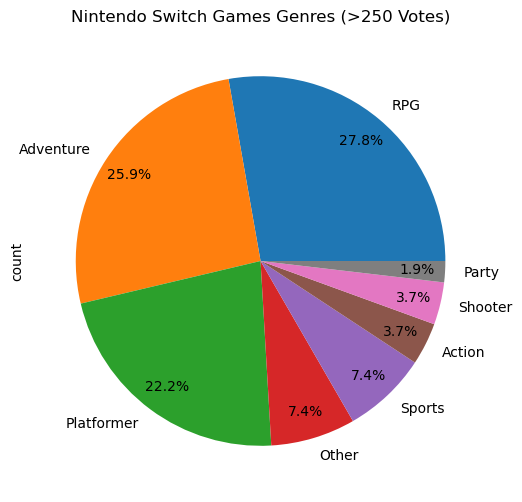

In [226]:
df_genres.plot(kind='pie', figsize = (10,6), autopct = '%1.1f%%', pctdistance=0.85)
plt.title('Nintendo Switch Games Genres (>250 Votes)')
plt.show()

In [233]:
# sort by game rating to find best options

df_reviewed_sorted = df_reviewed.sort_values(by='rating', ascending=False)

In [234]:
# remove columns less relevant to visualizations 

df_reviewed_sorted.drop(columns=['game_url','image_url','system'], inplace=True)
df_reviewed_sorted

,level_0,index,id,title,publisher,developer,genre,genre_reduced,num_players,release_date,review,review_conclusion,num_votes,rating
53,53,636,97fc82c2,The Legend of Zelda: Breath of the Wild,Nintendo,Nintendo SPD,Action Adventure,Adventure,1,3rd Mar 2017,The Legend of Zelda has always been a franchis...,The Legend of Zelda: Breath of the Wild is a l...,2782,9.6
13,13,241,8f5138a4,Xenoblade Chronicles: Definitive Edition,Nintendo,Monolith Soft,RPG,RPG,1,29th May 2020,If you were around to browse this site about n...,Simply put there’s almost nothing one can rea...,479,9.3
2,2,88,fbc872d6,Metroid Dread,Nintendo,Nintendo MercurySteam,Action Adventure,Adventure,1,8th Oct 2021,After absolutely nailing its first shot at a M...,Metroid Dread is a triumphant return for both ...,952,9.3
46,46,599,11c59773,Super Mario Odyssey,Nintendo,Nintendo,Adventure Platformer,Platformer,2,27th Oct 2017,For some gamers the idea of a ‘sandbox’ Mario ...,Super Mario Odyssey represents a shift in dire...,3497,9.2
27,27,451,1c3e8da8,Super Smash Bros. Ultimate,Nintendo,Nintendo,Action Fighting,Action,8,7th Dec 2018,Crossovers happen all the time in games films...,So how does it all stack up? Vocal concerns ab...,1573,9.2
7,7,163,64d5aa53,Super Mario 3D World + Bowsers Fury,Nintendo,Nintendo,Action Platformer,Platformer,4,12th Feb 2021,Well it’s finally here. The 35th anniversary ...,Super Mario 3D World remains one of the better...,628,9.1
18,18,345,322d1231,Dragon Quest XI S: Echoes of an Elusive Age - ...,Square Enix,Square Enix,RPG,RPG,1,27th Sep 2019,It’s fascinating to see how much the JRPG genr...,Dragon Quest XI S: Echoes of an Elusive Age - ...,872,9.1
21,21,373,56c0abda,Fire Emblem: Three Houses,Nintendo,Intelligent Systems,Adventure RPG Strategy,RPG,1,26th Jul 2019,Fire Emblem has been through quite a rollercoa...,There was a lot riding on it but we can confi...,894,9.0
6,6,151,f646bcc3,Monster Hunter Rise,Capcom,Capcom,Action Adventure RPG,RPG,4,26th Mar 2021,This encounter felt fated. Written in the star...,New mechanics monsters and a gorgeous setting...,372,9.0
52,52,628,2a84ece6,Mario Kart 8 Deluxe,Nintendo,Nintendo,Racing,Sports,4 (12 Online),28th Apr 2017,Opting for enhanced and expanded deluxe / dire...,When it comes to passing final judgement on a ...,2460,9.0


In [237]:
# find top 10 single player games

df_reviewed_sorted['num_players'].value_counts()


num_players
1                21
4                13
2                12
8                 3
1 (8 Online)      2
4 (12 Online)     1
1 (12 Online)     1
Name: count, dtype: int64

In [242]:
#df_reviewed_sorted['num_players'].replace('1 (8 Online)', '1', inplace=True)
#df_reviewed_sorted['num_players'].replace('1 (12 Online)', '1', inplace=True)
df_reviewed_sorted['num_players'].replace('4 (12 Online)', '4', inplace=True)

In [243]:
df_reviewed_sorted['num_players'].value_counts()

num_players
1    24
4    14
2    12
8     3
Name: count, dtype: int64

In [247]:
df_top10_single_player = df_reviewed_sorted[df_reviewed_sorted['num_players']=='1'].head(10)
df_top10_single_player

,level_0,index,id,title,publisher,developer,genre,genre_reduced,num_players,release_date,review,review_conclusion,num_votes,rating
53,53,636,97fc82c2,The Legend of Zelda: Breath of the Wild,Nintendo,Nintendo SPD,Action Adventure,Adventure,1,3rd Mar 2017,The Legend of Zelda has always been a franchis...,The Legend of Zelda: Breath of the Wild is a l...,2782,9.6
13,13,241,8f5138a4,Xenoblade Chronicles: Definitive Edition,Nintendo,Monolith Soft,RPG,RPG,1,29th May 2020,If you were around to browse this site about n...,Simply put there’s almost nothing one can rea...,479,9.3
2,2,88,fbc872d6,Metroid Dread,Nintendo,Nintendo MercurySteam,Action Adventure,Adventure,1,8th Oct 2021,After absolutely nailing its first shot at a M...,Metroid Dread is a triumphant return for both ...,952,9.3
18,18,345,322d1231,Dragon Quest XI S: Echoes of an Elusive Age - ...,Square Enix,Square Enix,RPG,RPG,1,27th Sep 2019,It’s fascinating to see how much the JRPG genr...,Dragon Quest XI S: Echoes of an Elusive Age - ...,872,9.1
21,21,373,56c0abda,Fire Emblem: Three Houses,Nintendo,Intelligent Systems,Adventure RPG Strategy,RPG,1,26th Jul 2019,Fire Emblem has been through quite a rollercoa...,There was a lot riding on it but we can confi...,894,9.0
32,32,490,2771051d,Xenoblade Chronicles 2: Torna - The Golden Cou...,Nintendo,Monolith Soft,Adventure RPG,RPG,1,21st Sep 2018,By the time Xenoblade Chronicles 2 launched in...,Nintendo Switch is no stranger to DLC and add-...,264,8.9
14,14,257,06847e1a,Animal Crossing: New Horizons,Nintendo,Nintendo,Adventure Puzzle Simulation,Adventure,1,20th Mar 2020,Back when – what feels like forever ago – we f...,Animal Crossing: New Horizons takes Animal Cro...,1214,8.8
42,42,575,a92c3c6b,Xenoblade Chronicles 2,Nintendo,Monolith Soft,Action Adventure RPG,RPG,1,1st Dec 2017,It seems so long ago now but the latter half ...,Xenoblade Chronicles 2 on the Switch wont disa...,710,8.8
3,3,117,20c3d5f7,The Great Ace Attorney Chronicles,Capcom,Capcom,Adventure,Adventure,1,27th Jul 2021,The last time we saw Phoenix Wright and friend...,The Great Ace Attorney Chronicles is two brill...,286,8.7
17,17,331,1411efdb,The Witcher 3: Wild Hunt - Complete Edition,CD Projekt Red,CD Projekt Red,Action RPG,RPG,1,15th Oct 2019,Originally released on other platforms back in...,The Witcher 3: Wild Hunt remains a masterpiece...,547,8.7


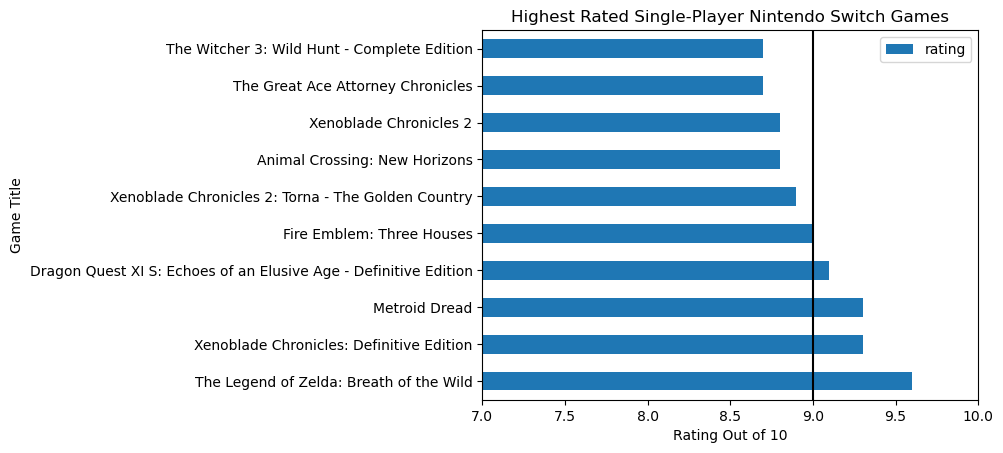

In [289]:
# plot rating of top 10 single player games

df_top10_single_player.plot(kind='barh', x = 'title', y = 'rating')
plt.title('Highest Rated Single-Player Nintendo Switch Games')
plt.xlabel('Rating Out of 10')
plt.axvline(x=9, color='black')
plt.ylabel('Game Title')
plt.xlim(7,10)
plt.show()

In [293]:
df_top10_two_player = df_reviewed_sorted[df_reviewed_sorted['num_players']=='2'].head(10)
df_top10_four_player = df_reviewed_sorted[df_reviewed_sorted['num_players']=='4'].head(10)
df_top10_eight_player = df_reviewed_sorted[df_reviewed_sorted['num_players']=='8'].head(10)

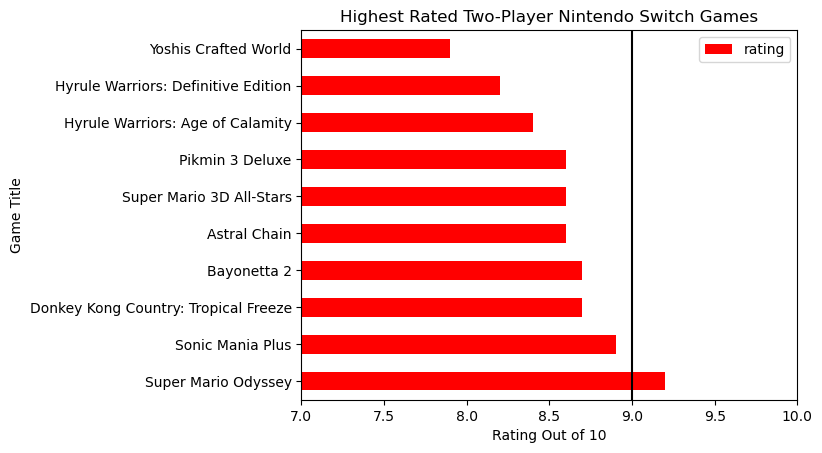

In [290]:
# plot top 10 2-player games

df_top10_two_player.plot(kind='barh', x = 'title', y = 'rating', color='red')
plt.title('Highest Rated Two-Player Nintendo Switch Games')
plt.xlabel('Rating Out of 10')
plt.axvline(x=9, color='black')
plt.ylabel('Game Title')
plt.xlim(7,10)
plt.show()


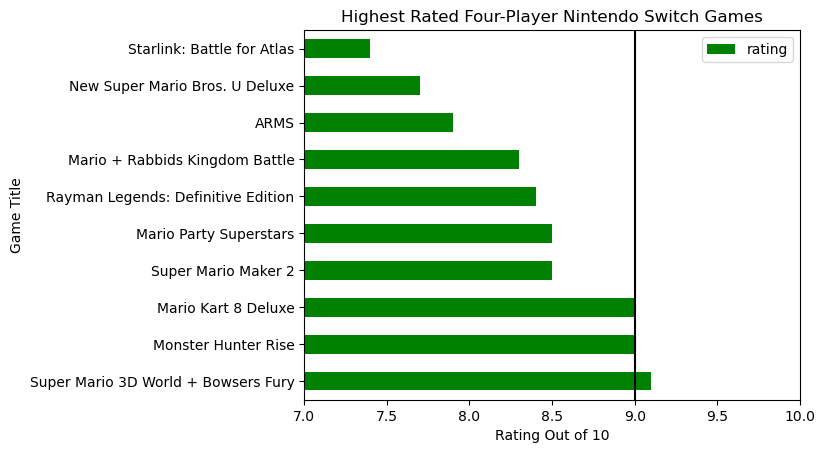

In [291]:
# plot top 10 4-player games

df_top10_four_player.plot(kind='barh', x = 'title', y = 'rating', color='green')
plt.title('Highest Rated Four-Player Nintendo Switch Games')
plt.xlabel('Rating Out of 10')
plt.ylabel('Game Title')
plt.axvline(x=9, color='black')
plt.xlim(7,10)
plt.show()

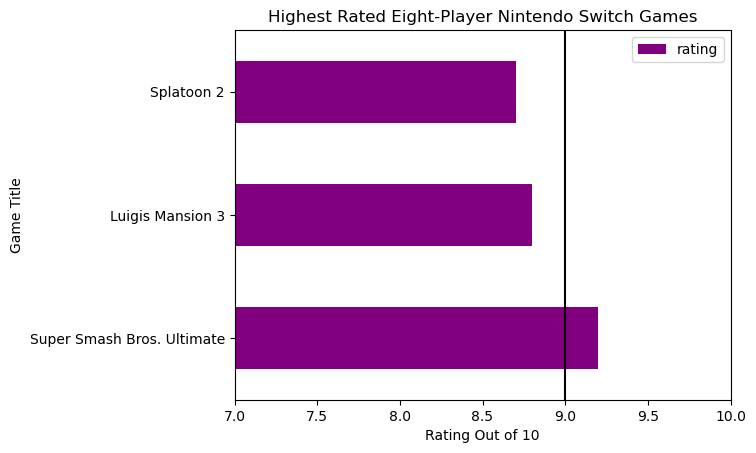

In [294]:
# plot top 8-player games

df_top10_eight_player.plot(kind='barh', x = 'title', y = 'rating', color='purple')
plt.title('Highest Rated Eight-Player Nintendo Switch Games')
plt.xlabel('Rating Out of 10')
plt.ylabel('Game Title')
plt.axvline(x=9, color='black')
plt.xlim(7,10)
plt.show()

In [288]:
# who are the developers of the top rated games?

df_reviewed_sorted[df_reviewed_sorted['rating']>=9]['developer']

53              Nintendo SPD
13             Monolith Soft
2     Nintendo  MercurySteam
46                  Nintendo
27                  Nintendo
7                   Nintendo
18               Square Enix
21       Intelligent Systems
6                     Capcom
52                  Nintendo
Name: developer, dtype: object